In [2]:
import numpy as np
import pandas as pd
import geopandas as gd
import matplotlib.pyplot as plt
import seaborn as sns
import contextily as ctx
from shapely.wkt import loads

In [3]:
%matplotlib inline

In [4]:
fields = gd.read_file('../outputs/fields_shape.shp')
targets = pd.read_csv('../data/targets.csv', index_col='region', thousands=',')

In [5]:
region_codes = ['KR', 'SE', 'SW']
crs = {'init': 'epsg:3857'}

In [6]:
optimal_tables = [pd.read_csv(f'../outputs/optimal_{region_code}.csv') for region_code in region_codes]
all_optimal = pd.concat(optimal_tables, ignore_index=True, sort=False)
all_optimal['geometry'] = all_optimal['geometry'].apply(loads)
fields_optimal = gd.GeoDataFrame(all_optimal, crs={'init': 'epsg:3857'}, geometry=all_optimal['geometry'])

In [7]:
trials_tables = [pd.read_csv(f'../outputs/trials_{region_code}.csv') for region_code in region_codes]
trials = pd.concat(trials_tables, ignore_index=True, sort=False)

In [8]:
regions = gd.read_file('../spatial/PPIC_Region.shp')

In [9]:
plt.rcParams["figure.figsize"] = (20,10)

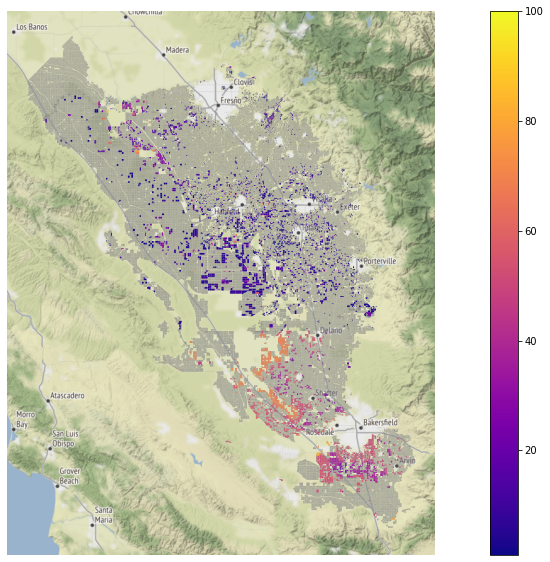

In [10]:
base = fields.plot(color='grey', alpha=0.6)
fields_optimal.plot(ax=base, column='outcome', cmap='plasma', vmin = 1, vmax = 100, legend=True)
ctx.add_basemap(base, url=ctx.sources.ST_TERRAIN, reset_extent=True)
base.set_axis_off()

C:\Users\Erik\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


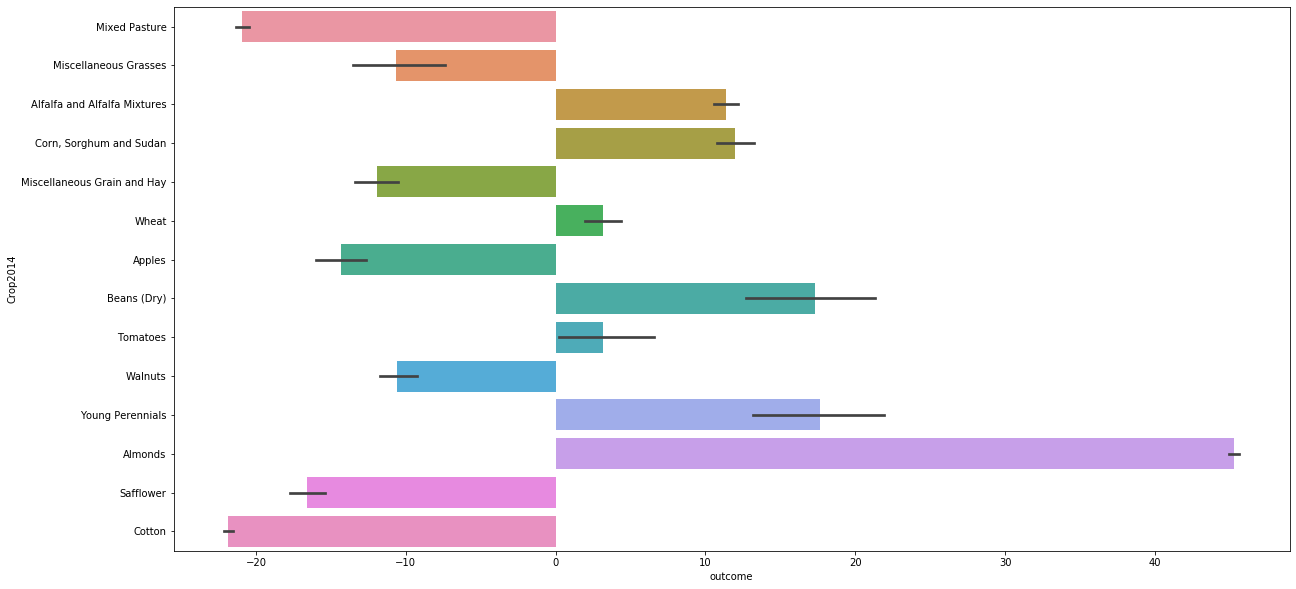

In [11]:
crop_mean_outcome = fields_optimal['outcome'].mean()
sns.barplot(data=fields_optimal, x='outcome', y='Crop2014', estimator = (lambda x: np.mean(x)-crop_mean_outcome), ci=90)

In [12]:
crop_mean_outcome

24.204135123066226

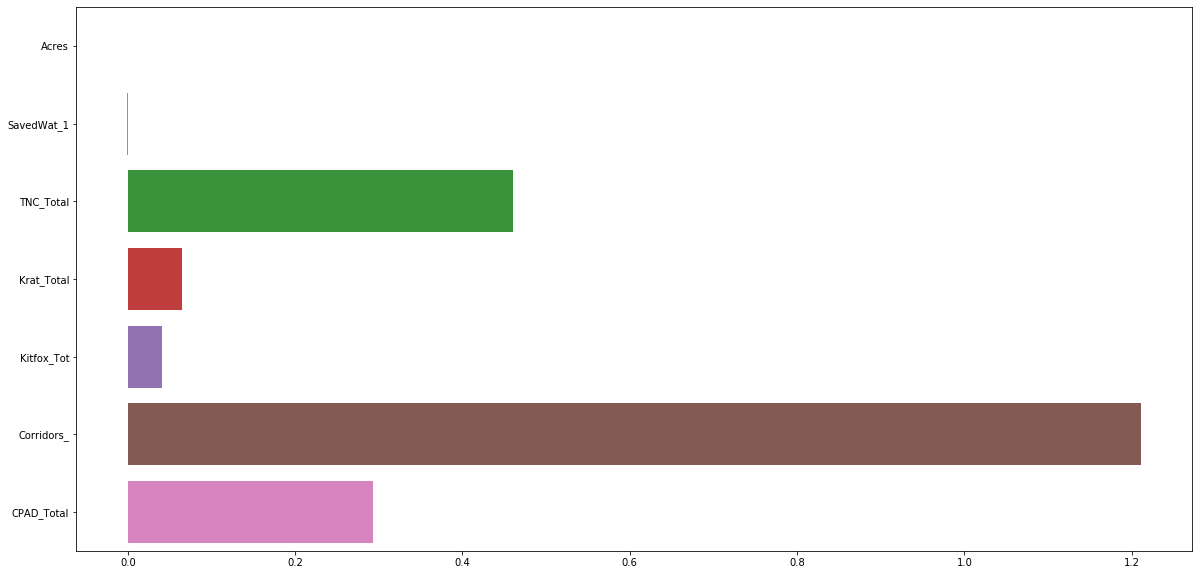

In [13]:
plot_cols = ['Acres', 'SavedWat_1', 'TNC_Total', 'Krat_Total', 'Kitfox_Tot', 'Corridors_',
            'CPAD_Total']  #Exclude FieldCropPrice and optimal
optimal = fields_optimal[plot_cols].sum()
as_usual = trials[plot_cols].mean()*3
pct_chg = (optimal - as_usual)/as_usual
sns.barplot(x = pct_chg, y = fields_optimal[plot_cols].columns)

In [14]:
optimal

Acres         385815.741010
SavedWat_1     62479.804553
TNC_Total      42959.199775
Krat_Total    144669.550848
Kitfox_Tot    168320.673388
Corridors_     35492.352216
CPAD_Total    169170.196036
dtype: float64

In [15]:
as_usual

Acres         385512.666321
SavedWat_1     62547.080478
TNC_Total      29406.681062
Krat_Total    135836.699907
Kitfox_Tot    161634.551995
Corridors_     16047.441457
CPAD_Total    130815.468167
dtype: float64

In [16]:
fields_optimal[plot_cols].head()

,Acres,SavedWat_1,TNC_Total,Krat_Total,Kitfox_Tot,Corridors_,CPAD_Total
0,76.002196,16.604977,76.002196,76.002196,76.002196,0.0,76.002196
1,49.319529,10.775202,49.319529,49.319529,49.319529,0.0,49.319529
2,33.045659,7.219803,33.045659,33.045659,33.045659,0.0,33.045659
3,18.954615,4.141173,18.954615,18.954615,18.954615,0.0,18.954615
4,16.917084,3.696156,16.917084,16.917084,16.917084,0.0,16.917084


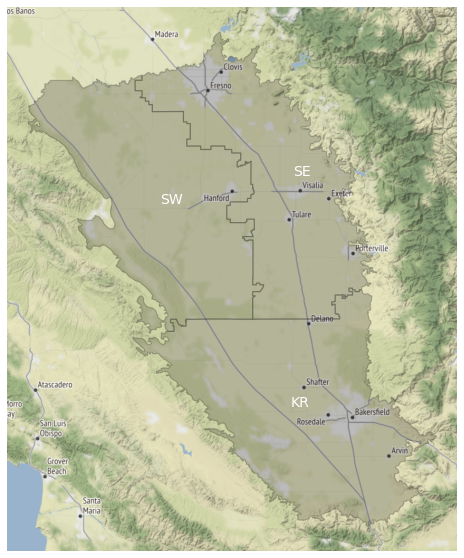

In [41]:
regions_to_plot = regions[regions['PPIC_Regio'].isin(region_codes)]
ax = regions_to_plot.plot(linewidth=1.2, edgecolor='k', color='k', alpha=.2)
for idx, row in regions_to_plot.iterrows():
    plt.annotate(s=row['PPIC_Regio'], 
                 xy=tuple([row.geometry.representative_point().x, row.geometry.representative_point().y]),
                ha='center',
                color='w',
                fontsize=14)
ctx.add_basemap(ax, url=ctx.sources.ST_TERRAIN, reset_extent=True)
ax.set_axis_off()

In [18]:
targets[targets.index.isin(region_codes)]

,alfalfa-pasture,corn,field-crops-grains,veg-fruits,trees-vines
region,,,,,
SW,36820.0,3880.0,72350.0,8400.0,7750.0
SE,38760.0,16150.0,124030.0,650.0,9690.0
KR,88500.0,54910.0,42640.0,3230.0,11630.0


In [19]:
targets.index

Index(['NW', 'NE', 'SW', 'SE', 'KR'], dtype='object', name='region')

In [29]:
regions_to_plot.representative_point().y

0    4.220676e+06
3    4.354855e+06
4    4.338451e+06
dtype: float64